# this is a juniper notebook for learning pandas 

In [1]:
import pandas as pd
import numpy as np

## creation of dataframes: 
The DataFrame is essentially a two dimensional object, and it can be created in three different ways:

- out of a two dimensional NumPy array
- out of given columns
- out of given rows

### creation of Dataframes from a NumPy array

In the following example a DataFrame with 2 rows and 3 column is created. The row and column indices are given explicitly.

In [2]:
df=pd.DataFrame(np.random.randn(2,3), columns=["First", "Second", "Third"], index=["a", "b"])
df

,First,Second,Third
a,1.456765,-0.651768,0.645883
b,-1.080484,-1.454338,-0.811491


### Setting Indexes
you can set the index of a data frame using the set_index() method after the creation of the data frame

eg:

In [3]:
df = pd.DataFrame({'State':['United Kingdom','Finland','USA','Sweden','Germany','Russia'],'Year of independence':[np.nan,1917,1776,1523,np.nan,1992],'President':[np.nan,'Niinistö','Trump',np.nan,'Steinmeier','Putin']})
df.set_index('State',inplace=True)
df

,Year of independence,President
State,,
United Kingdom,NaN,NaN
Finland,1917.0,Niinistö
USA,1776.0,Trump
Sweden,1523.0,NaN
Germany,NaN,Steinmeier
Russia,1992.0,Putin


### index and column names
you can use <name>.index and <name>.coulmns to find the names of the coulmns and indexes 
- if you leave out coulmns or index names poandas will fill them in with integers starting from 1

In [4]:
df.index

Index(['United Kingdom', 'Finland', 'USA', 'Sweden', 'Germany', 'Russia'], dtype='object', name='State')

In [5]:
df.columns

Index(['Year of independence', 'President'], dtype='object')

## Creating DataFrames from rows
We can give a list of rows as a parameter to the DataFrame constructor. Each row is given as a dict, list, Series, or NumPy array. 

eg:

In [6]:
df=pd.DataFrame([{"Wage" : 1000, "Name" : "Jack", "Age" : 21}, {"Wage" : 1500, "Name" : "John", "Age" : 29}])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


## Accessing columns and rows of a dataframe
when you index a coulmn or a row you need to specify the name of the column or row. You cannot just index using an integer value. The same goes for fgancy indexing when you index multipul items.
EG:

In [7]:
try:
    df[0]
except KeyError:
    import sys
    print("Key error", file=sys.stderr)

Key error


In [8]:
df['Wage']

0    1000
1    1500
Name: Wage, dtype: int64

In [9]:
df[['Wage', 'Name']]

,Wage,Name
0,1000,Jack
1,1500,John


in pandas, you can however use regular integer indexing through slicing for rows when the rows are not labeled and use boolean masks.

In [10]:
df[0:1]

,Wage,Name,Age
0,1000,Jack,21


In [11]:
df[df.Wage > 1200]

,Wage,Name,Age
1,1500,John,29


## Alternative indexing and data selection

There is another way to index Pandas DataFrames, which
- allows use of index pairs to access a single element
- has the same order of dimensions as NumPy: first index specifies rows, second columns
- is not ambiguous about implicit or explicit indices
these are called loc and iloc

The difference between loc and iloc attributes is that the former uses explicit indices and the latter uses the implicit integer indices.
eg:

In [12]:
df.loc[1, "Wage"]

1500

In [13]:
df.iloc[-1,-1]             # Right lower corner of the DataFrame

29

In [14]:
df.loc[1, ["Name", "Wage"]]

Name    John
Wage    1500
Name: 1, dtype: object

## Summary stratistics
The summary statistic methods work in a similar way as their counter parts in NumPy. By default, the aggregation is done over columns.

In [15]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

wh2 = wh.drop(["Year", "m", "d"], axis=1)  # taking averages over these is not very interesting
wh2.mean()

C:\Users\henry\AppData\Local\Temp\ipykernel_12232\388209308.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wh2.mean()


Precipitation amount (mm)    1.966301
Snow depth (cm)              0.966480
Air temperature (degC)       6.527123
dtype: float64

the describe method gives a different summary stratistics for each numeric column. The resulty is a dataframe

In [16]:
wh.describe()

,Year,m,d,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
count,365.0,365.000000,365.000000,365.000000,358.000000,365.000000
mean,2017.0,6.526027,15.720548,1.966301,0.966480,6.527123
std,0.0,3.452584,8.808321,4.858423,3.717472,7.183934
min,2017.0,1.000000,1.000000,-1.000000,-1.000000,-17.800000
25%,2017.0,4.000000,8.000000,-1.000000,-1.000000,1.200000
50%,2017.0,7.000000,16.000000,0.200000,-1.000000,4.800000
75%,2017.0,10.000000,23.000000,2.700000,0.000000,12.900000
max,2017.0,12.000000,31.000000,35.000000,15.000000,19.600000


## Missing data 

we can see that the Snow depth has 358 entries, yet there are only 365 days in a year, so how? 
this si because Snowdeapth likly has somw nan entries. In Pandas nan can be used to represent a missing value. In the weather DataFrame the nan value tells us that the measurement from that day is not available, possibly due to a broken measuring instrument or some other problem.

we can get rid of nan values by using the isnull() mothod in pandas 
(the notnull() mehtod works conversly to the isnull() mothod)

In [17]:
wh.isnull()

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False


we can then combine this with the any() method to fiund all rows that contine at least one missing value 

In [18]:
wh[wh.isnull().any(axis=1)]

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)
74,2017,3,16,00:00,UTC,1.8,NaN,3.4
163,2017,6,13,00:00,UTC,0.6,NaN,12.6
308,2017,11,5,00:00,UTC,0.2,NaN,8.4
309,2017,11,6,00:00,UTC,2.0,NaN,7.5
313,2017,11,10,00:00,UTC,3.6,NaN,7.2
321,2017,11,18,00:00,UTC,11.3,NaN,5.9
328,2017,11,25,00:00,UTC,8.5,NaN,4.2


finally we can use the dropna() method to drop the columns contining missing values 

In [19]:
wh.dropna(axis=1).shape

(365, 7)

alternitivly, we can use the fillna() method to replace the missing values 

The method parameter can be:

- None: use the given positional parameter as the constant to fill missing values with
- ffill: use the previous value to fill the current value
- bfill: use the next value to fill the current value

For example:

In [20]:
wh = wh.fillna(method='ffill')
wh[wh.isnull().any(axis=1)]

,Year,m,d,Time,Time zone,Precipitation amount (mm),Snow depth (cm),Air temperature (degC)


The interpolate method, which we will not cover here, offers more elaborate ways to interpolate the missing values from their neighbouring non-missing values.

### Converting columns from one type to another 
## There are three different methods for changing data types 
1. map()
2. astypre()
3. downcase()

In [21]:
# eg1: mapping a string to an int
pd.Series(["1","2"]).map(int)

0    1
1    2
dtype: int64

In [22]:
# eg2: changing a string to a int using downcasting
pd.to_numeric(pd.Series([1,1.0]), downcast="integer") 

0    1
1    1
dtype: int8

In [23]:
# eg3: changing a int to a str using astype()
pd.Series([1,2]).astype(str)  # works for a single series

0    1
1    2
dtype: object

In [24]:
# eg4: chaning the type of different columns of a DataFrame
df = pd.DataFrame({"a": [1,2,3], "b" : [4,5,6], "c" : [7,8,9]})
df2 = df.astype({"b" : float, "c" : str})    # different types for columns
print(df2.dtypes)
print(df2)

a      int64
b    float64
c     object
dtype: object
   a    b  c
0  1  4.0  7
1  2  5.0  8
2  3  6.0  9


### String processing 

If the elements in a column are strings, then the vectorized versions of Python's string processing methods are available.

One can find all the available methods by pressing the tab key after the text names.str. in a Python prompt.



In [25]:
# for example. you can use pythons capitalize() function to capitalize the first letter of all strings in a series 
names = pd.Series(["john", "jane", "joe"])
names.str.capitalize()
names.str.capitalize()

0    John
1    Jane
2     Joe
dtype: object

In [26]:
# eg2: you can use pythons split() function to split a string into a list of substrings

full_names = pd.Series(["Donald Trump", "Theresa May", "Angela Merkel", "Vladimir Putin"])
full_names.str.split()


0      [Donald, Trump]
1       [Theresa, May]
2     [Angela, Merkel]
3    [Vladimir, Putin]
dtype: object

In [27]:
# eg3: if you want to go one step further and split strings into seterate columns, you can use the expand parameter
full_names.str.split(expand=True)

,0,1
0,Donald,Trump
1,Theresa,May
2,Angela,Merkel
3,Vladimir,Putin


### Catenating datasets 

you can catenate dataframes in pandas similarily to how you do in numpy, however you need to pay extra attension to the names of the rows and columns 

Also note a slight difference in the name: np.concatenate() but pd.concat().

In [28]:
import pandas as pd
import numpy as np

def makedf(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

df1 = makedf('AB', [1, 2])
df1

,A,B
1,A1,B1
2,A2,B2


In [29]:
df2 = makedf('AB', [3, 4])
df2

,A,B
3,A3,B3
4,A4,B4


In [30]:
df3 = makedf('CD', [1, 2])
df3

,C,D
1,C1,D1
2,C2,D2


In [31]:
df4 = makedf('BC', [3, 4])
df4

,B,C
3,B3,C3
4,B4,C4


In [32]:
# the folowing prints as expected
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [33]:
# However this one has double indices
r = pd.concat([df1,df1])
r

,A,B
1,A1,B1
2,A2,B2
1,A1,B1
2,A2,B2


In [34]:
r.loc[1, 'A']

1    A1
1    A1
Name: A, dtype: object

There are a few ways to get around this problem. Firstly you can use try except statements:

In [35]:
try:
    pd.concat([df1,df1], verify_integrity=True)
except ValueError as e:
    import sys
    print(e, file=sys.stderr)

Indexes have overlapping values: Int64Index([1, 2], dtype='int64')


Secondly, you can use the ignore_ingex peramiter 

In [36]:
pd.concat([df1,df1], ignore_index=True)

,A,B
0,A1,B1
1,A2,B2
2,A1,B1
3,A2,B2


Finally we can ask for hierarchical indexing. in this case the indices can contain multiple levels, by makeing a two dimensional array to work like higher dimensional array.

In [37]:
r2 = pd.concat([df1,df1], keys=['first', 'second'])
r2

A   B
first  1  A1  B1
       2  A2  B2
second 1  A1  B1
       2  A2  B2

In [38]:
r2["A"]["first"][1]

'A1'

 you can also concatenate horizontally

In [39]:
pd.concat([df1,df3], axis=1)

,A,B,C,D
1,A1,B1,C1,D1
2,A2,B2,C2,D2


We have so far assumed that when concatenating vertically the columns of both DataFrames are the same, and when joining horizontally the indices are the same. This is, however, not required:

In [40]:
pd.concat([df1,df4], sort=False)    # sort option is used to silence a deprecation message


,A,B,C
1,A1,B1,NaN
2,A2,B2,NaN
3,NaN,B3,C3
4,NaN,B4,C4


It expanded the non-existing cases with NaNs. This method is called an outer join, which forms the union of columns in the two DataFrames. The alternative is inner join, which forms the intersection of columns:

In [41]:
pd.concat([df1,df4], join = 'inner')    # sort option is used to silence a deprecation message


,B
1,B1
2,B2
3,B3
4,B4


### Merging dataframes
we can merger two dataframse with one element in common

eg: 

In [42]:
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


In [43]:
df2 = pd.DataFrame({"Name" : ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


In [44]:
pd.merge(df, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


If not all the keys of the comon element exist in both dataframes, by default an inner join is done.

In [45]:
df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], "Occupation":["Painter"]})], ignore_index=True)
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [46]:
pd.merge(df, df3)                # By default an inner join is computed

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [47]:
# however you can also do an outer join
pd.merge(df, df3, how="outer")   # Outer join


,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,1500.0,John,29.0,Plumber
2,NaN,James,NaN,Painter


Also, many-to-one and many-to-many relationships can occur in merges:


In [48]:

books = pd.DataFrame({"Title" : ["War and Peace", "Good Omens", "Good Omens"] , 
                      "Author" : ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]})
books

,Title,Author
0,War and Peace,Tolstoi
1,Good Omens,Terry Pratchett
2,Good Omens,Neil Gaiman


In [49]:
collections = pd.DataFrame([["Oodi", "War and Peace"],
                           ["Oodi", "Good Omens"],
                           ["Pasila", "Good Omens"],
                           ["Kallio", "War and Peace"]], columns=["Library", "Title"])
collections

,Library,Title
0,Oodi,War and Peace
1,Oodi,Good Omens
2,Pasila,Good Omens
3,Kallio,War and Peace


In [50]:
libraries_with_books_by = pd.merge(books, collections)
libraries_with_books_by

,Title,Author,Library
0,War and Peace,Tolstoi,Oodi
1,War and Peace,Tolstoi,Kallio
2,Good Omens,Terry Pratchett,Oodi
3,Good Omens,Terry Pratchett,Pasila
4,Good Omens,Neil Gaiman,Oodi
5,Good Omens,Neil Gaiman,Pasila


### Aggregates and groupings 
we can change the name of a coulmn using the rename() method.


In [51]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

In [52]:
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation", "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


Pandas has a method that can split a DataFrame into groups by a given element. you can then use those groups to perform some operation on each othe the groups individually. 
You can do this using the groupby() method 

eg: 
Here we group the weather data by the month the data is found in ( for example all rows with month = "febuary" are grouped together)

In [53]:
groups = wh3.groupby("Month")
groups

In [54]:
len(groups)


12

In [55]:
for key, group in groups:
    print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [56]:
groups.get_group(2)  # Group with index two is February

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
31,2017,2,1,00:00,UTC,1.5,4.0,-0.6
32,2017,2,2,00:00,UTC,0.2,5.0,-0.8
33,2017,2,3,00:00,UTC,-1.0,6.0,-0.2
34,2017,2,4,00:00,UTC,2.7,6.0,0.4
35,2017,2,5,00:00,UTC,-1.0,7.0,-2.5
36,2017,2,6,00:00,UTC,-1.0,7.0,-7.3
37,2017,2,7,00:00,UTC,-1.0,8.0,-12.1
38,2017,2,8,00:00,UTC,-1.0,8.0,-8.8
39,2017,2,9,00:00,UTC,-1.0,8.0,-10.1
40,2017,2,10,00:00,UTC,-1.0,8.0,-8.3


The groups themselves take teh form of a groupby object. tHis functions a bit like a DataFrame, so some operations which are allowed for DataFrames are also allowed for the groupby object. For example, we can get a subset of columns:

In [57]:
groups['Temperature']

In [58]:
groups['Temperature'].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

Now what happened was that after the mean aggregation was performed on each group, the results were automatically combined into a resulting DataFrame. Let's try some other aggregation:

In [59]:
groups['Precipitation'].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

In [60]:
# as we can see, the -1 percipitation values seem to be causing some problems (we ccannot have -5.9 cm of percipitation) so we'll replace them with NaNs
wh4 = wh3.copy()
wh4.loc[wh4['Precipitation'] < 0, 'Precipitation'] = np.nan
wh4.loc[wh4.Snow == -1, 'Snow'] = np.nan
wh4.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,NaN,NaN,0.6
1,2017,1,2,00:00,UTC,4.4,NaN,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,NaN,13.0,-12.8
4,2017,1,5,00:00,UTC,NaN,10.0,-17.8


In [61]:
# now we regroup 
wh4.groupby('Month')['Precipitation'].sum()

Month
1      38.9
2      35.0
3      41.7
4      39.9
5      16.1
6      76.3
7      31.2
8      86.1
9      65.2
10    184.5
11    120.2
12    140.6
Name: Precipitation, dtype: float64

### Other ways to operate on groups
The aggregations are not the only possible operations on groups. The other possibilities are filtering, transformation, and application.

eg:

In [62]:
def myfilter(df):                                     # The filter function must return a boolean value
    return df["Precipitation"].sum() >= 150

wh4.groupby("Month").filter(myfilter)                 # Filter out months with total precipitation less that 150 mm

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
273,2017,10,1,00:00,UTC,NaN,NaN,9.1
274,2017,10,2,00:00,UTC,6.4,NaN,9.2
275,2017,10,3,00:00,UTC,21.5,NaN,8.3
276,2017,10,4,00:00,UTC,12.7,NaN,11.2
277,2017,10,5,00:00,UTC,0.6,NaN,8.8
278,2017,10,6,00:00,UTC,0.7,NaN,7.7
279,2017,10,7,00:00,UTC,11.7,NaN,8.1
280,2017,10,8,00:00,UTC,14.1,NaN,9.3
281,2017,10,9,00:00,UTC,18.3,NaN,8.6
282,2017,10,10,00:00,UTC,24.2,NaN,8.1


In a _**transformation**_ each group's DataFrame is manipulated in a way that retains its shape. An example of centering values, so that the deviations from the monthly means are shown:

In [63]:
pd.concat([wh4.iloc[:, 0:3], wh4.groupby("Month")[["Precipitation", "Snow", "Temperature"]].transform(lambda x : x - x.mean())], axis=1)

,Year,Month,Day,Precipitation,Snow,Temperature
0,2017,1,1,NaN,NaN,2.916129
1,2017,1,2,2.352632,NaN,-1.583871
2,2017,1,3,4.552632,-0.37931,-4.183871
3,2017,1,4,NaN,5.62069,-10.483871
4,2017,1,5,NaN,2.62069,-15.483871
...,...,...,...,...,...,...
360,2017,12,27,-4.758333,NaN,2.058065
361,2017,12,28,-2.158333,NaN,1.058065
362,2017,12,29,1.941667,NaN,2.058065
363,2017,12,30,-1.758333,NaN,0.758065


The _**apply**_ method is a very generic method that applys a rule to the dataframe. It only requires that for each group's DataFrame the given function returns a DataFrame, Series, or a scalar. In the following example, we sort within each group by the temperature

In [64]:
wh4.groupby("Month").apply(lambda df : df.sort_values("Temperature"))

Year  Month  Day   Time Time zone  Precipitation  Snow  Temperature
Month                                                                         
1     4    2017      1    5  00:00       UTC            NaN  10.0        -17.8
      5    2017      1    6  00:00       UTC            0.3  10.0        -17.8
      3    2017      1    4  00:00       UTC            NaN  13.0        -12.8
      2    2017      1    3  00:00       UTC            6.6   7.0         -6.5
      15   2017      1   16  00:00       UTC            NaN   8.0         -4.2
...         ...    ...  ...    ...       ...            ...   ...          ...
12    360  2017     12   27  00:00       UTC            1.1   NaN          3.8
      362  2017     12   29  00:00       UTC            7.8   NaN          3.8
      342  2017     12    9  00:00       UTC            0.2   NaN          4.2
      336  2017     12    3  00:00       UTC            7.2   NaN          5.0
      341  2017     12    8  00:00       UTC            2.0   NaN          5.2

[365 rows x 8 columns]

### Time series 
If a measurement is made at certain points in time, the resulting values with their measurement times is called a time series. 

In [65]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

If your dataframe has values for day month and year, you can convert those values into a datetime object with the to_datetime() method

In [66]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [67]:
# to simplify the datam, we can get rid of the useless coulmns
wh2=wh2.drop(columns=["Year", "Month", "Day"]) 
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [68]:
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


using this method, it makes it really easy to sort rows of a certain date

In [69]:
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


we can also use the date_range function to sort for certain months or days 

In [70]:
r = pd.date_range('2017-07-01', '2017-07-31', freq="w-mon")
r

DatetimeIndex(['2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [71]:
wh2.index.difference(r)


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=360, freq=None)

In [72]:
wh2.loc[r,:]

,Time,Time zone,Precipitation,Snow,Temperature
2017-07-03,00:00,UTC,2.2,-1.0,14.5
2017-07-10,00:00,UTC,-1.0,-1.0,18.0
2017-07-17,00:00,UTC,2.7,-1.0,15.4
2017-07-24,00:00,UTC,-1.0,-1.0,15.7
2017-07-31,00:00,UTC,0.1,-1.0,17.8


In [73]:
# this time we find all work days between 2017-07-01 and 2017-07-31

pd.date_range("2017-07-01", "2017-07-31", freq="b")

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='B')

with time series, we can use matplotlib plots look much more ogranised: 

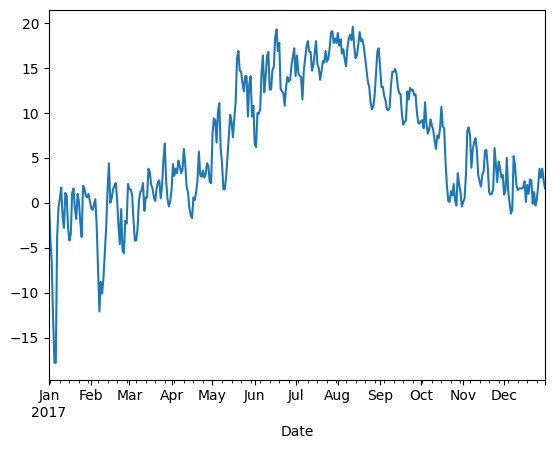

In [74]:
%matplotlib inline
wh2["Temperature"].plot();

In [75]:
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0,method=single]

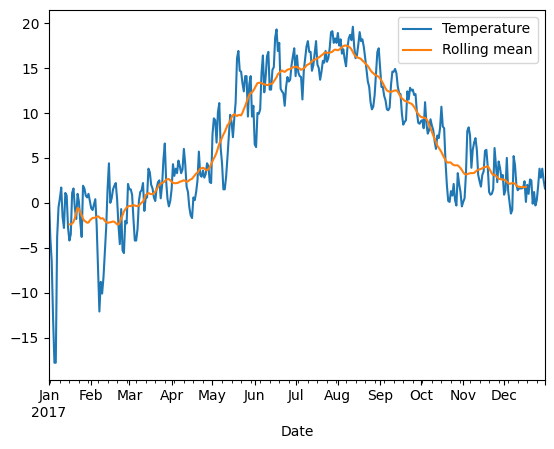

In [77]:
data = pd.DataFrame({"Temperature" : wh2.Temperature, "Rolling mean" : rolling.mean()})
data.plot();